In [50]:
# importing some libraries that I will use in this script
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np

# codes below adjust the number of rows and columns displayed by Pandas, remove the # sign if you would like Pandas to display data beyond the default configuration 
# pd.options.display.max_rows= 40000
# pd.options.display.max_columns= 6

# The line below defines the pathway to store plots which will be used throughout the script
fig_folder = "../plots//"


In [47]:
# The line below gets the CSV file which is stored in the "source" folder
csv="../source/trump_insult_tweets_2014_to_2021.csv"
# This line reads the CSV file called in the previous line
df_trump=pd.read_csv(csv)
# This line displays the content of the CSV file stored in the object " df_trump"
df_trump

# Uncomment the lines below if you want to see the length of the dataset or a random sample of the data
#len(df_trump)
#df_trump.sample(10)

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."
...,...,...,...,...,...
10355,10356,2021-01-06,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...
10356,10357,2021-01-06,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they..."
10357,10358,2021-01-06,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late..."
10358,10359,2021-01-06,2020-election,a FRAUD,The States want to redo their votes. They foun...


# <font color = "magenta">In the cell below, I am rearranging and adjusting the data frame (df_trump) </font>

In [48]:
#this line removes the column "Unnamed:0" from the df_trump and only keeps the index column
df_trump.drop(df_trump.columns[0], axis= 1, inplace= True)

# Since I want to attribute dates to day of the week I am using the to_datetime method in Pandas
df_trump['date'] = pd.to_datetime(df_trump['date'])
df_trump['day_of_week'] = df_trump['date'].dt.day_name()

# Next I am going to rearrange the columns in a way that date and day_of_week become adjacent
new_column_order = ['date', 'day_of_week', 'target', 'insult', 'tweet']
df_trump = df_trump[new_column_order]

# the date column in the df_trump was not a date.time format, so I am converting it to the proper format
df_trump['date'] = pd.to_datetime(df_trump['date'])


# I am filtering the data to the years Donald Trump was in office, Early 2017 to late 2020
df_trump = df_trump[(df_trump['date'] >= '2017-01-01') & (df_trump['date'] <= '2020-12-31')]

# <font color = "yellow"> Now that I have sorted the dataframe and filtered it out I try to plot some interesting findings </font>

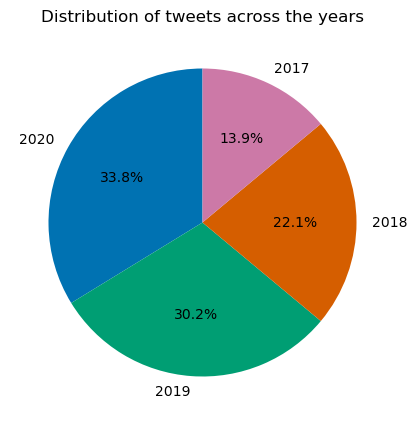

In [49]:
#  get the total number of tweets in each year and sort in ascending order

tweets_per_year = df_trump['date'].dt.year.value_counts().sort_index(ascending=False)

# I am using the colorblind-friendly palette from Seaborn
plt.figure(figsize=(5,5))
plt.pie(tweets_per_year, labels=tweets_per_year.index, autopct='%1.1f%%', startangle=90, colors= ['#0072B2', '#009E73', '#D55E00', '#CC79A7'])
plt.title('Distribution of tweets across the years')
plt.show()

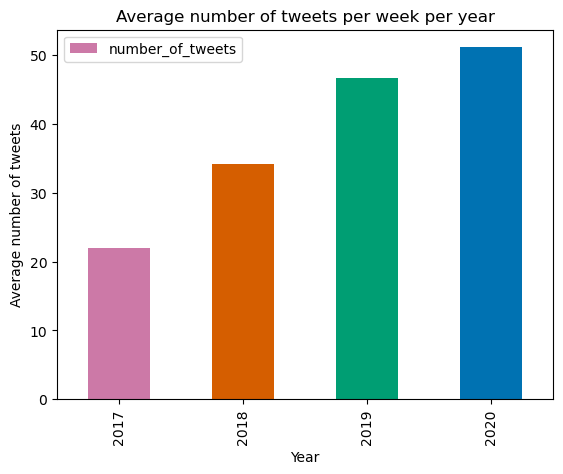

In [56]:



# Get the average number of tweets per week per year
df_trump['week'] = df_trump['date'].dt.isocalendar().week
df_trump['year'] = df_trump['date'].dt.year
df_week = df_trump.groupby(['year', 'week']).size().reset_index(name='number_of_tweets')
df_week = df_week.groupby('year')['number_of_tweets'].mean().reset_index()

# Plotting
import matplotlib.pyplot as plt
df_week.plot(x='year', y='number_of_tweets', kind='bar', color=['#CC79A7', '#D55E00','#009E73','#0072B2'  ])
plt.xlabel('Year')
plt.ylabel('Average number of tweets')
plt.title('Average number of tweets per week per year')
plt.show()


<Figure size 1000x500 with 0 Axes>

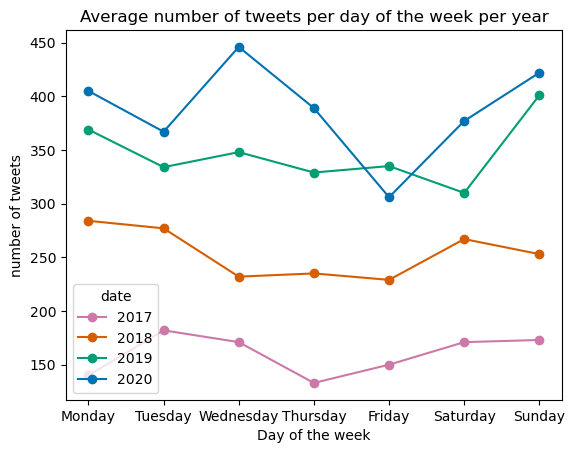

In [62]:

# make a line plot of the average number of tweets per day of the week per year and use this '#CC79A7', '#D55E00','#009E73','#0072B2' as the color for the lines
plt.figure(figsize=(10,5))
tweets_per_day_of_week.plot(kind='line', marker='o', color=['#CC79A7', '#D55E00','#009E73','#0072B2'])
plt.title('Average number of tweets per day of the week per year')
plt.xlabel('Day of the week')
plt.ylabel('number of tweets')
plt.show()









<Figure size 1500x2000 with 0 Axes>

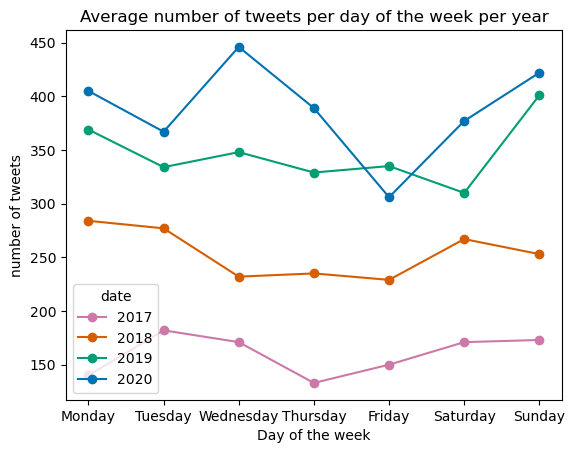

In [67]:
tweets_per_day_of_week = df_trump.groupby(['day_of_week', df_trump['date'].dt.year]).size().unstack()
tweets_per_day_of_week = tweets_per_day_of_week.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(15,20))
tweets_per_day_of_week.plot(kind='line', marker='o', color=['#CC79A7', '#D55E00','#009E73','#0072B2'])
plt.title('Average number of tweets per day of the week per year')
plt.xlabel('Day of the week')
plt.ylabel('number of tweets')
plt.show()


In [63]:

# get the lowest number of tweets per day of the week per year
tweets_per_day_of_week.idxmin()

# get the highst number of tweets per day of the week per year
tweets_per_day_of_week.idxmax()


date
2017      Tuesday
2018       Monday
2019       Sunday
2020    Wednesday
dtype: object

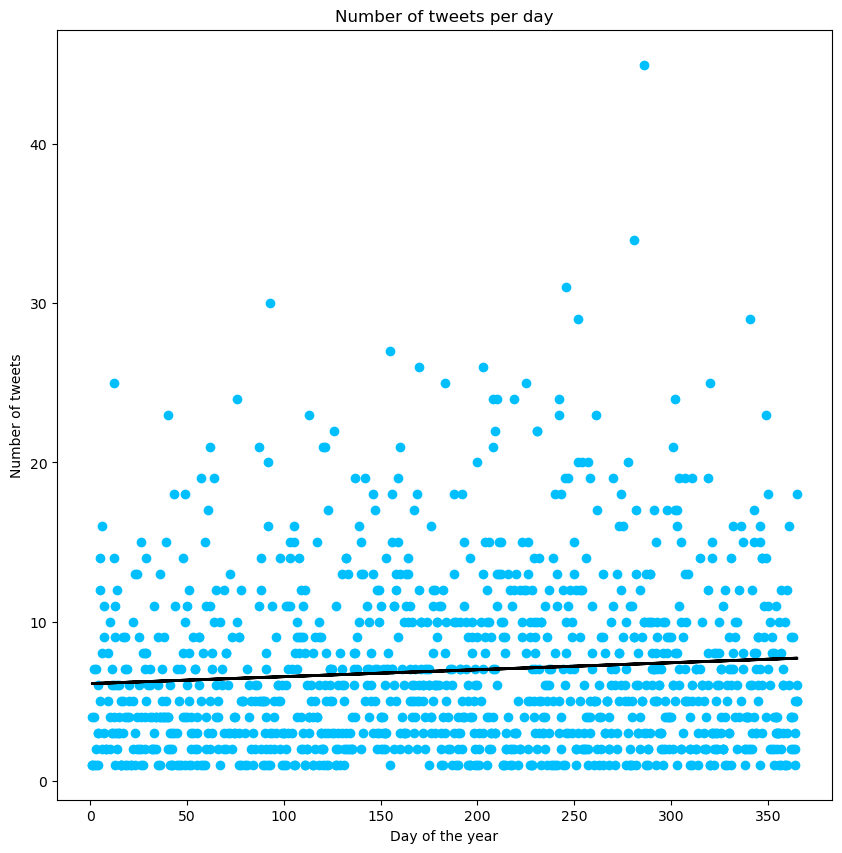

In [51]:
# get the total number of tweets per day
tweets_per_day = df_trump['date'].value_counts().sort_index()
# create a dataframe with the number of tweets per day
df_tweets_per_day = pd.DataFrame({'date': tweets_per_day.index, 'tweets': tweets_per_day.values})
# create a new column with the day of the year
df_tweets_per_day['day_of_year'] = df_tweets_per_day['date'].dt.dayofyear
# fit a linear regression model to the data
model = LinearRegression()
model.fit(df_tweets_per_day[['day_of_year']], df_tweets_per_day['tweets'])
# make predictions with the model
predictions = model.predict(df_tweets_per_day[['day_of_year']])
# plot the data and the predictions # make the dots and line colorblind friendly, the prediction line should be dashed and bold
plt.figure(figsize=(10,10))
plt.scatter(df_tweets_per_day['day_of_year'], df_tweets_per_day['tweets'], color='deepskyblue')
plt.plot(df_tweets_per_day['day_of_year'], predictions, color='black', linestyle='-', linewidth=2)
plt.title('Number of tweets per day')
plt.xlabel('Day of the year')
plt.ylabel('Number of tweets')
plt.show()

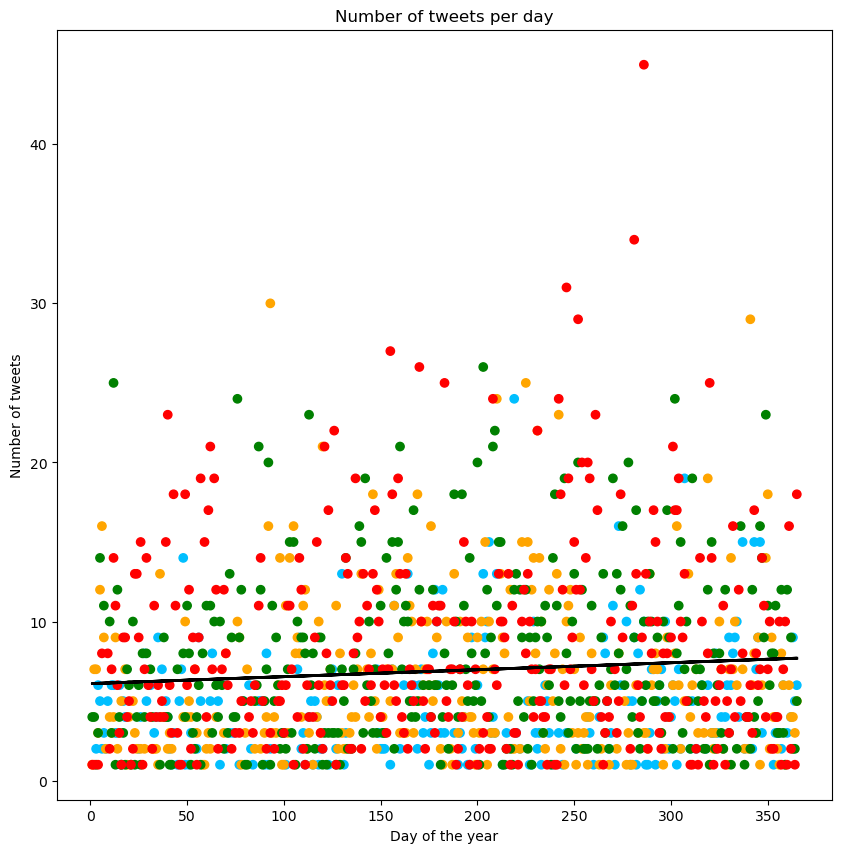

In [52]:
# a linear regression model to predict the number of tweets per day
from sklearn.linear_model import LinearRegression
import numpy as np
# get the total number of tweets per day
tweets_per_day = df_trump['date'].value_counts().sort_index()
# create a dataframe with the number of tweets per day
df_tweets_per_day = pd.DataFrame({'date': tweets_per_day.index, 'tweets': tweets_per_day.values})
# create a new column with the day of the year
df_tweets_per_day['day_of_year'] = df_tweets_per_day['date'].dt.dayofyear
# fit a linear regression model to the data
model = LinearRegression()
model.fit(df_tweets_per_day[['day_of_year']], df_tweets_per_day['tweets'])
# make predictions with the model
predictions = model.predict(df_tweets_per_day[['day_of_year']])
# allocate a color to data points of each year
colors = np.array(['deepskyblue', 'orange', 'green', 'red', 'purple'])  # Add more colors if needed
plt.figure(figsize=(10,10))
plt.scatter(df_tweets_per_day['day_of_year'], df_tweets_per_day['tweets'], color=colors[df_tweets_per_day['date'].dt.year - df_tweets_per_day['date'].dt.year.min()])
plt.plot(df_tweets_per_day['day_of_year'], predictions, color='black', linestyle='-', linewidth=2)
plt.title('Number of tweets per day')
plt.xlabel('Day of the year')
plt.ylabel('Number of tweets')
plt.show()



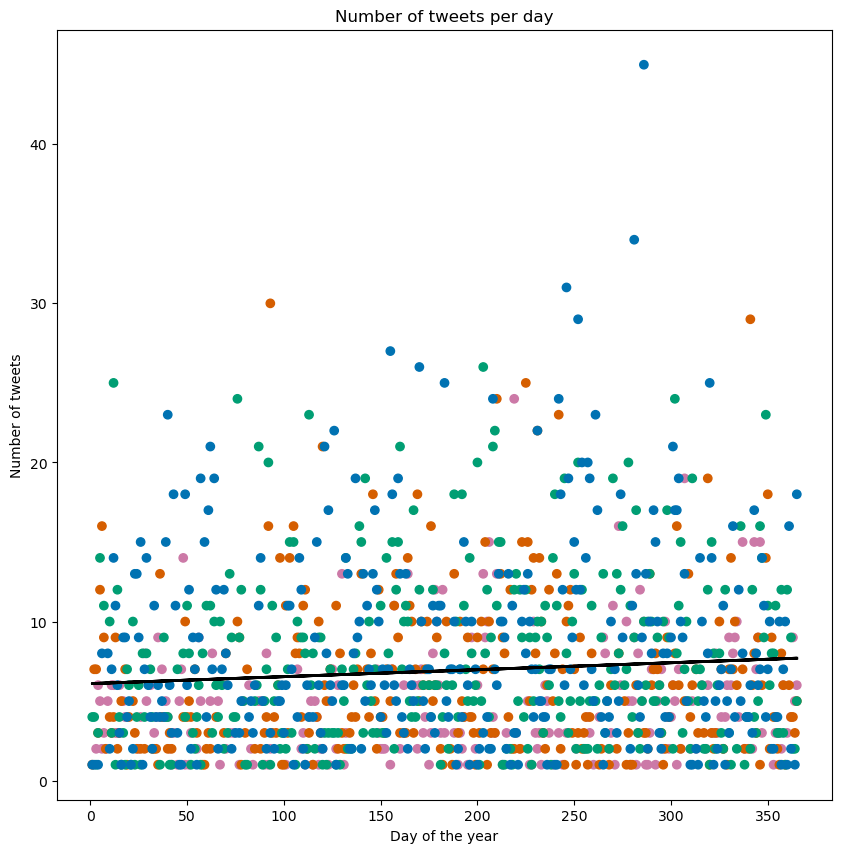

In [60]:
# a linear regression model to predict the number of tweets per day
from sklearn.linear_model import LinearRegression
import numpy as np
# get the total number of tweets per day
tweets_per_day = df_trump['date'].value_counts().sort_index()
# create a dataframe with the number of tweets per day
df_tweets_per_day = pd.DataFrame({'date': tweets_per_day.index, 'tweets': tweets_per_day.values})
# create a new column with the day of the year
df_tweets_per_day['day_of_year'] = df_tweets_per_day['date'].dt.dayofyear
# fit a linear regression model to the data
model = LinearRegression()
model.fit(df_tweets_per_day[['day_of_year']], df_tweets_per_day['tweets'])
# make predictions with the model
predictions = model.predict(df_tweets_per_day[['day_of_year']])
# allocate a color to data points of each year
colors = np.array(['#CC79A7', '#D55E00','#009E73','#0072B2'])  # Add more colors if needed
plt.figure(figsize=(10,10))
plt.scatter(df_tweets_per_day['day_of_year'], df_tweets_per_day['tweets'], color=colors[df_tweets_per_day['date'].dt.year - df_tweets_per_day['date'].dt.year.min()])
plt.plot(df_tweets_per_day['day_of_year'], predictions, color='black', linestyle='-', linewidth=2)
plt.title('Number of tweets per day')
plt.xlabel('Day of the year')
plt.ylabel('Number of tweets')
plt.show()









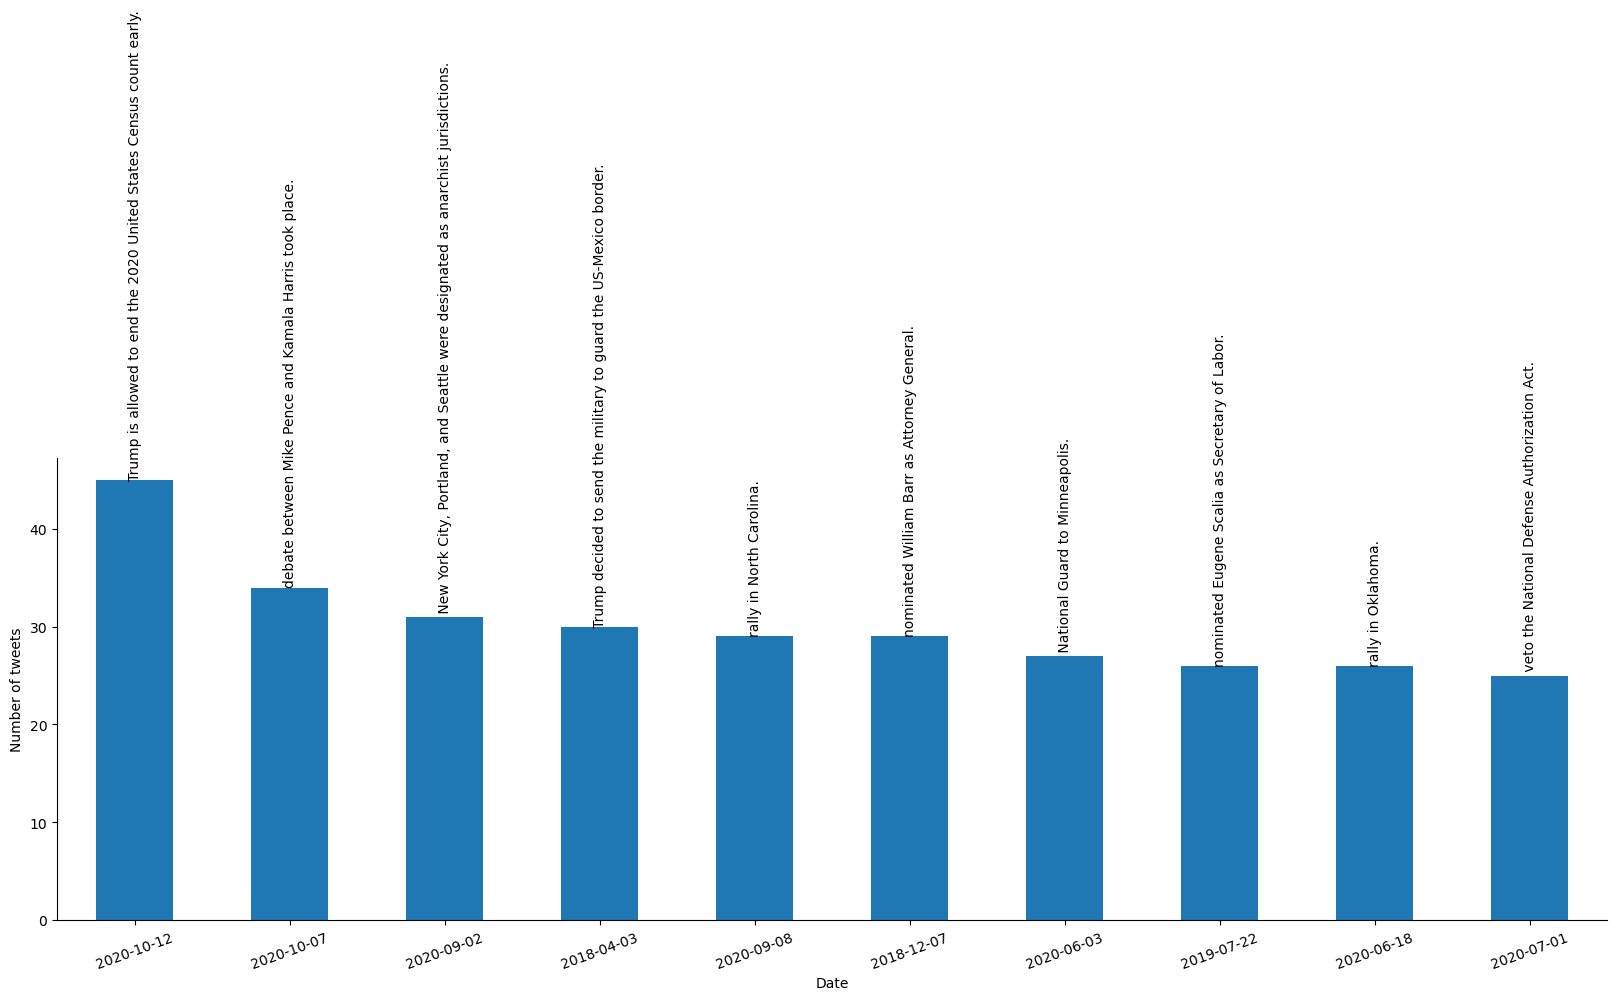

In [55]:
# the dates with the most tweets top 10
df_trump['date'] = pd.to_datetime(df_trump['date'])
df_trump['date'].value_counts().head(10)


# find what major event happened on the top 10 dates with the most tweets in this cell
# top 10 dates with the most tweets
top_10_dates = df_trump['date'].value_counts().head(10).reset_index()
top_10_dates.columns = ['date', 'number_of_tweets']
top_10_dates
# major events on the top 10 dates with the most tweets
major_events = [
   "Trump is allowed to end the 2020 United States Census count early.",
          "debate between Mike Pence and Kamala Harris took place.",
          " New York City, Portland, and Seattle were designated as anarchist jurisdictions.",
          "Trump decided to send the military to guard the US-Mexico border.",
          "rally in North Carolina.",
          "nominated William Barr as Attorney General.",
          " National Guard to Minneapolis.",
          "nominated Eugene Scalia as Secretary of Labor.",
          "rally in Oklahoma.",
          " veto the National Defense Authorization Act."
]
major_events


# set x-axis tick labels
dates = top_10_dates['date'].dt.strftime('%Y-%m-%d')
ax.set_xticklabels(dates, rotation=20)  # Set rotation to 90 degrees

# add event labels to the plot
plt.figure(figsize=(20, 6))  # Adjust the width and height as needed
ax = df_trump['date'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.title('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# set x-axis tick labels
dates = top_10_dates['date'].dt.strftime('%Y-%m-%d')
ax.set_xticklabels(dates, rotation=20)  # Set rotation to 20 degrees

# add event labels to the plot
for i, event in enumerate(major_events):
    plt.text(i, top_10_dates['number_of_tweets'][i], event, ha='center', va='bottom', rotation=90)


plt.show()






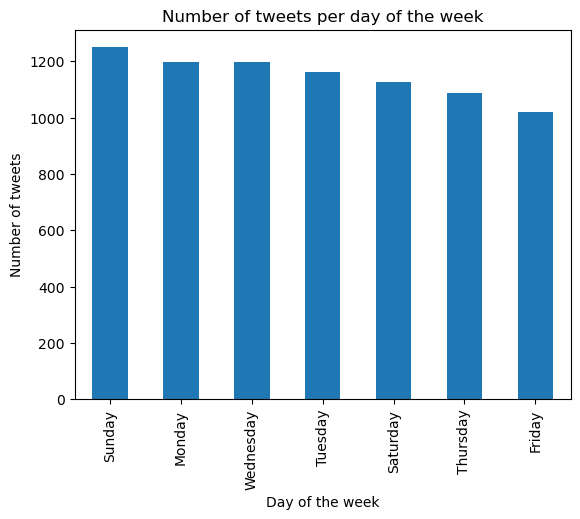

In [39]:
# get the number of tweets per day of the week
df_trump['date'] = df_trump['date'].astype(str)
df_trump['day_of_week'].value_counts().plot(kind='bar')
plt.xlabel('Day of the week')
plt.ylabel('Number of tweets')
plt.title('Number of tweets per day of the week')
plt.show()




In [40]:
# average number of tweets per each individual day for each year
df_day_of_week_per_year = df_trump.groupby(['date', 'day_of_week']).size().reset_index()
df_day_of_week_per_year.columns = ['date', 'day_of_week', 'number_of_tweets']
df_day_of_week_per_year = df_day_of_week_per_year.groupby('day_of_week')['number_of_tweets'].mean().reset_index()
df_day_of_week_per_year = df_day_of_week_per_year.sort_values(by='number_of_tweets', ascending=False)
df_day_of_week_per_year

,day_of_week,number_of_tweets
3,Sunday,7.662577
1,Monday,7.304878
6,Wednesday,7.210843
2,Saturday,6.944444
5,Tuesday,6.744186
4,Thursday,6.621951
0,Friday,6.000000


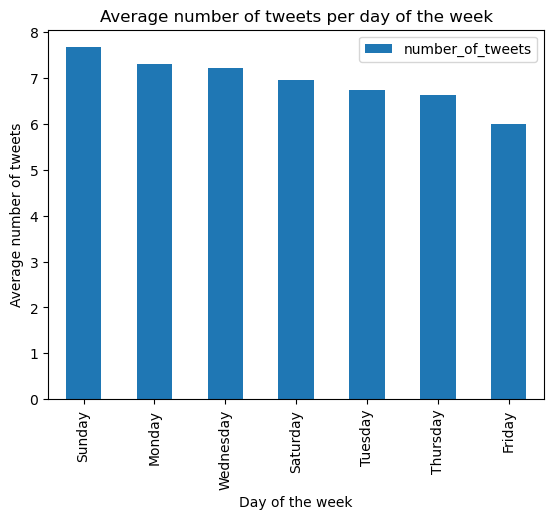

In [41]:
# make a barplot of df_day_of_week_per_year
df_day_of_week_per_year.plot(kind='bar', x='day_of_week', y='number_of_tweets')
plt.xlabel('Day of the week')
plt.ylabel('Average number of tweets')
plt.title('Average number of tweets per day of the week')
plt.show()

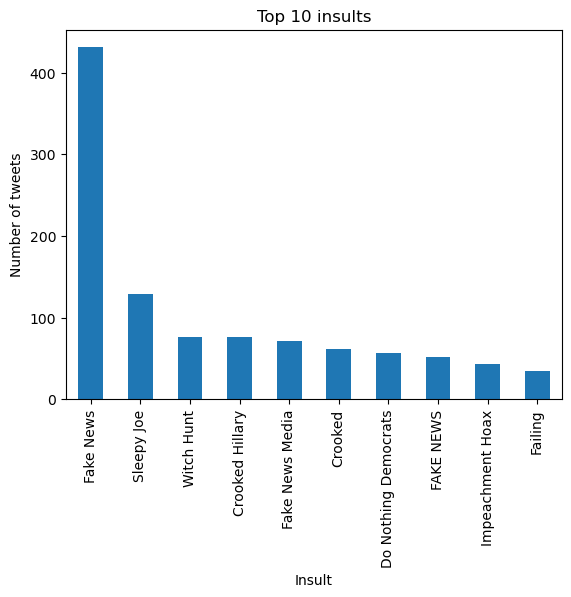

In [42]:
# in df_trump, get the number of each insult 
insults = df_trump['insult'].value_counts()
insults
# make a barplot of top 10 insults
insults.head(10).plot(kind='bar')
plt.xlabel('Insult')
plt.ylabel('Number of tweets')
plt.title('Top 10 insults')
plt.show()


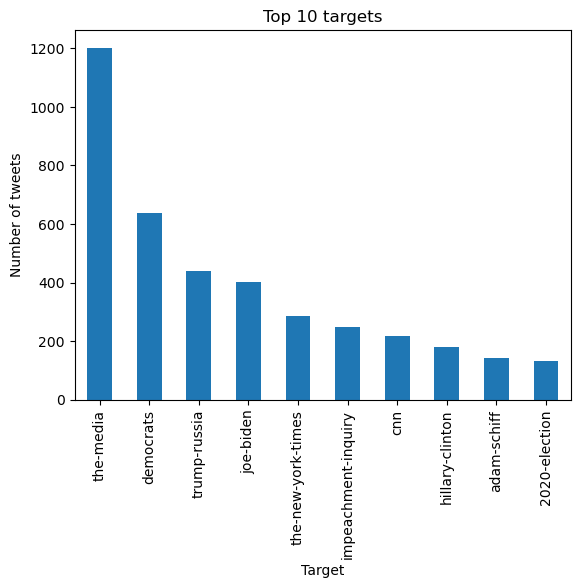

In [43]:
# in df_trump, get the number of each target
targets = df_trump['target'].value_counts()
targets
# make a barplot of top 10 targets
targets.head(10).plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Number of tweets')
plt.title('Top 10 targets')
plt.show()


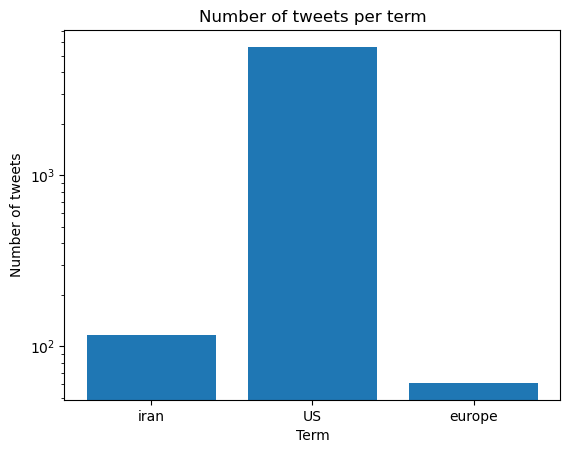

In [44]:
# number of the term "iran" in df_trump "tweet", "target" and "insult" columns and sum up the results
iran = df_trump['tweet'].str.contains('iran', case=False).sum() + df_trump['target'].str.contains('iran', case=False).sum() + df_trump['insult'].str.contains('iran', case=False).sum()
iran

# number of the term "US" in df_trump "tweet", "target" and "insult" columns and sum up the results
US = df_trump['tweet'].str.contains('US', case=False).sum() + df_trump['target'].str.contains('US', case=False).sum() + df_trump['insult'].str.contains('US', case=False).sum()
US

# number of the term "Europe" in df_trump "tweet", "target" and "insult" columns and sum up the results
europe = df_trump['tweet'].str.contains('europe', case=False).sum() + df_trump['target'].str.contains('europe', case=False).sum() + df_trump['insult'].str.contains('europe', case=False).sum()
europe

# make a bar plot of iran, US and europe, log scale
plt.bar(['iran', 'US', 'europe'], [iran, US, europe])
plt.yscale('log')
plt.xlabel('Term')
plt.ylabel('Number of tweets')
plt.title('Number of tweets per term')
plt.show()



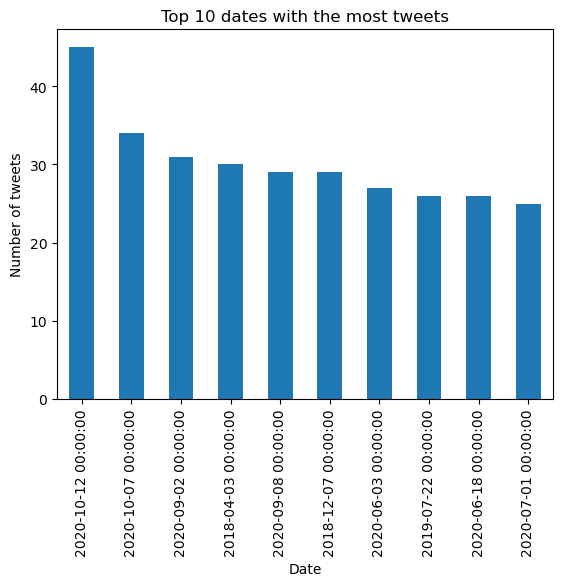

,date,number_of_tweets
0,2020-10-12,45
1,2020-10-07,34
2,2020-09-02,31
3,2018-04-03,30
4,2020-09-08,29
5,2018-12-07,29
6,2020-06-03,27
7,2019-07-22,26
8,2020-06-18,26
9,2020-07-01,25


In [45]:
# the dates with the most tweets top 10
df_trump['date'] = pd.to_datetime(df_trump['date'])
df_trump['date'].value_counts().head(10)
# make a bar plot of the top 10 dates with the most tweets
df_trump['date'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.title('Top 10 dates with the most tweets')
plt.show()

# store the top 10 dates and the context with the most tweets in a variable
top_10_dates = df_trump['date'].value_counts().head(10).reset_index()
top_10_dates.columns = ['date', 'number_of_tweets']
top_10_dates




